In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/Administrator/Desktop/gitCourse/2022.8.1New/exchange_rates.csv')
columsList=[colum for colum in df]
columsList
df_China=df[[columsList[0],columsList[4],columsList[2]]]
df_China=df_China.drop(labels=range(5))
df_China=df_China.dropna()
df_China['Time Index']=(pd.to_datetime(df_China[columsList[0]])-pd.to_datetime('1981-01-02')).dt.days
columsList=[colum for colum in df_China]
df_China[columsList[1]]=df_China[columsList[1]].str.replace('ND',"")
df_China[columsList[2]]=df_China[columsList[2]].str.replace('ND',"")

df_China[columsList[1]]=pd.to_numeric(df_China[columsList[1]])
df_China[columsList[2]]=pd.to_numeric(df_China[columsList[2]])
df_China=df_China.dropna()
df_China.columns=["Date","China","UK","Days"]
columsList=[colum for colum in df_China]

df_China

#df_china
#from pandas.plotting import scatter_matrix
#scatter_matrix(df)

,Date,China,UK,Days
2614,1981-01-02,1.5341,2.3820,0
2615,1981-01-05,1.5418,2.4155,3
2616,1981-01-06,1.5264,2.4225,4
2617,1981-01-07,1.5264,2.4115,5
2618,1981-01-08,1.5264,2.4035,6
...,...,...,...,...
12170,2017-08-21,6.6630,1.2903,13380
12171,2017-08-22,6.6600,1.2834,13381
12172,2017-08-23,6.6569,1.2787,13382
12173,2017-08-24,6.6600,1.2802,13383


In [34]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df_China)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

X = df_China[['Days']]
y=df_China[columsList[1]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

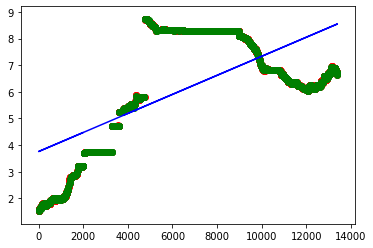

In [104]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color="r")
plt.scatter(X_test,y_test,color="g")
plt.plot(X_train,model.predict(X_train),color="b")



In [99]:
import statsmodels.formula.api as sm
formulaForexchange=columsList[1]+" ~ "+ columsList[2]
print(formulaForexchange)
model =sm.ols(formula=formulaForexchange,data=df_China)
result=model.fit()
result.summary()

China ~ UK


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  China   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.354
Date:                Wed, 03 Aug 2022   Prob (F-statistic):              0.245
Time:                        06:56:10   Log-Likelihood:                -20080.
No. Observations:                9148   AIC:                         4.016e+04
Df Residuals:                    9146   BIC:                         4.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9282      0.196     30.246      0.000       5.544       6.312
UK             0.1395      0.120      1.164      0.245      -0.095       0.374
==============================================================================
Omnibus:                     1316.569   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.334
Skew:                          -0.697   Prob(JB):                    4.40e-212
Kurtosis:                       2.219   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

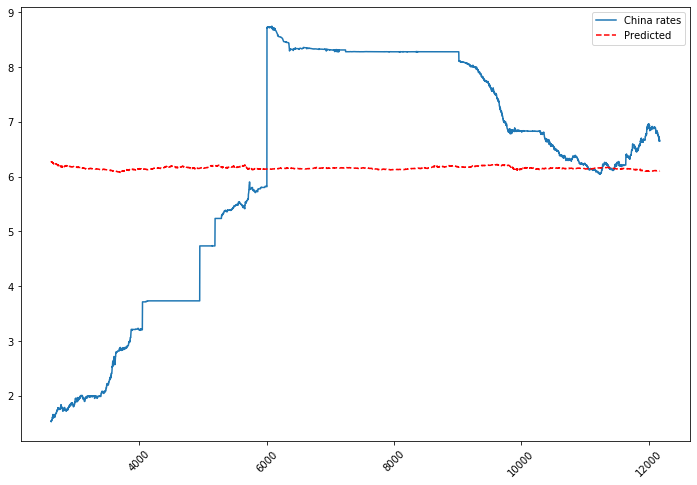

In [100]:

fig, ax = plt.subplots(figsize=(12, 8))

# plot the return for PXD and the model's prediction on the same axes for the date range
ax.plot(df_China['China'], label="China rates")
ax.plot(result.fittedvalues, "r--", label="Predicted")


legend = ax.legend(loc="best")
plt.xticks(rotation=45)

plt.show()